# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   https://www.kaggle.com/datasets/kundanbedmutha/exam-score-prediction-dataset

   Dataset ini berisi 20.000 data sintetis yang merepresentasikan faktor-faktor realistis yang memengaruhi kinerja ujian siswa, seperti kebiasaan belajar, gaya hidup, dan kondisi ujian. Variabel yang dicakup meliputi jam belajar, kehadiran, kualitas tidur, akses internet, metode belajar, fasilitas institusi, dan tingkat kesulitan ujian. Skor ujian (0–100) dihitung dengan rumus berbobot yang mencerminkan pola akademik nyata. Dataset ini aman dari data pribadi dan cocok digunakan untuk penelitian pendidikan, analisis statistik, serta eksplorasi pola dan faktor yang memengaruhi hasil ujian siswa.



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here# Library untuk manipulasi data
import pandas as pd
import numpy as np

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Library untuk evaluasi
from sklearn.metrics import classification_report, confusion_matrix

# Pengaturan visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

print("Library berhasil diimport!")

Library berhasil diimport!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Memuat dataset
df = pd.read_csv('../Exam_Score_Prediction_raw/Exam_Score_Prediction.csv')

# Menampilkan 5 baris pertama
print("=" * 60)
print("PREVIEW DATA (5 BARIS PERTAMA)")
print("=" * 60)
df.head()

PREVIEW DATA (5 BARIS PERTAMA)


,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [3]:
# Informasi dasar dataset
print("=" * 60)
print("INFORMASI DATASET")
print("=" * 60)
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print(f"\nNama kolom: {list(df.columns)}")
print("\n" + "=" * 60)
print("TIPE DATA SETIAP KOLOM")
print("=" * 60)
print(df.dtypes)

INFORMASI DATASET
Jumlah baris: 20000
Jumlah kolom: 13

Nama kolom: ['student_id', 'age', 'gender', 'course', 'study_hours', 'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty', 'exam_score']

TIPE DATA SETIAP KOLOM
student_id            int64
age                   int64
gender               object
course               object
study_hours         float64
class_attendance    float64
internet_access      object
sleep_hours         float64
sleep_quality        object
study_method         object
facility_rating      object
exam_difficulty      object
exam_score          float64
dtype: object


In [4]:
# Statistik deskriptif
print("=" * 60)
print("STATISTIK DESKRIPTIF")
print("=" * 60)
df.describe()

STATISTIK DESKRIPTIF


,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
# Cek missing values
print("=" * 60)
print("CEK MISSING VALUES")
print("=" * 60)
missing = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage (%)': missing_percent})
print(missing_df)
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

CEK MISSING VALUES
                  Missing Values  Percentage (%)
student_id                     0             0.0
age                            0             0.0
gender                         0             0.0
course                         0             0.0
study_hours                    0             0.0
class_attendance               0             0.0
internet_access                0             0.0
sleep_hours                    0             0.0
sleep_quality                  0             0.0
study_method                   0             0.0
facility_rating                0             0.0
exam_difficulty                0             0.0
exam_score                     0             0.0

Total missing values: 0


In [6]:
# Cek data duplikat
print("=" * 60)
print("CEK DATA DUPLIKAT")
print("=" * 60)
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")
print(f"Persentase duplikat: {(duplicates/len(df))*100:.2f}%")

CEK DATA DUPLIKAT
Jumlah baris duplikat: 0
Persentase duplikat: 0.00%


DATA UNIK PADA SETIAP KOLOM
Kolom 'student_id' memiliki 20000 nilai unik.
----------------------------------------
Kolom 'age' memiliki 8 nilai unik.
  Nilai unik: [17 23 22 20 18 21 24 19]
----------------------------------------
Kolom 'gender' memiliki 3 nilai unik.
  Nilai unik: ['male' 'other' 'female']
----------------------------------------
Kolom 'course' memiliki 7 nilai unik.
  Nilai unik: ['diploma' 'bca' 'b.sc' 'b.tech' 'bba' 'ba' 'b.com']
----------------------------------------
Kolom 'study_hours' memiliki 784 nilai unik.
----------------------------------------
Kolom 'class_attendance' memiliki 589 nilai unik.
----------------------------------------
Kolom 'internet_access' memiliki 2 nilai unik.
  Nilai unik: ['yes' 'no']
----------------------------------------
Kolom 'sleep_hours' memiliki 59 nilai unik.
----------------------------------------
Kolom 'sleep_quality' memiliki 3 nilai unik.
  Nilai unik: ['poor' 'average' 'good']
----------------------------------------
K

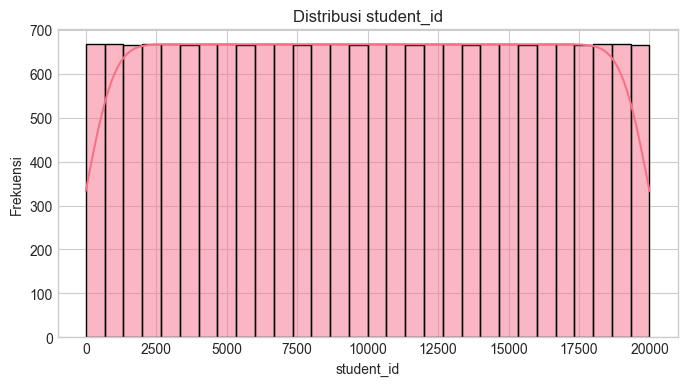

<Figure size 800x400 with 0 Axes>

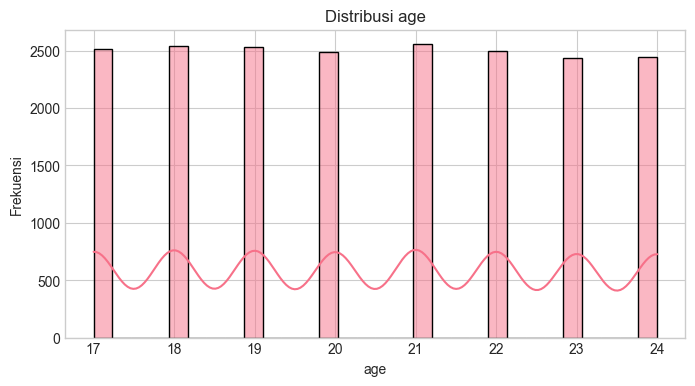

<Figure size 800x400 with 0 Axes>

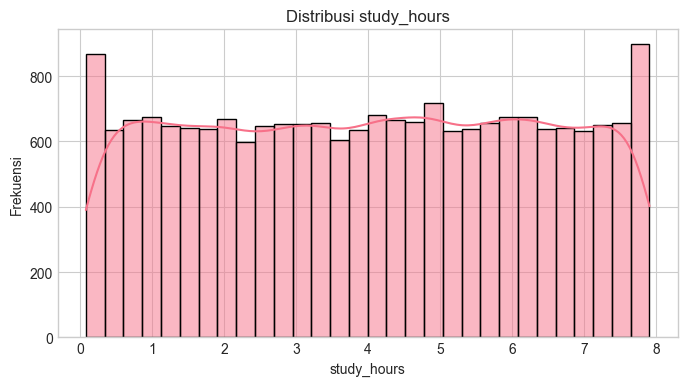

<Figure size 800x400 with 0 Axes>

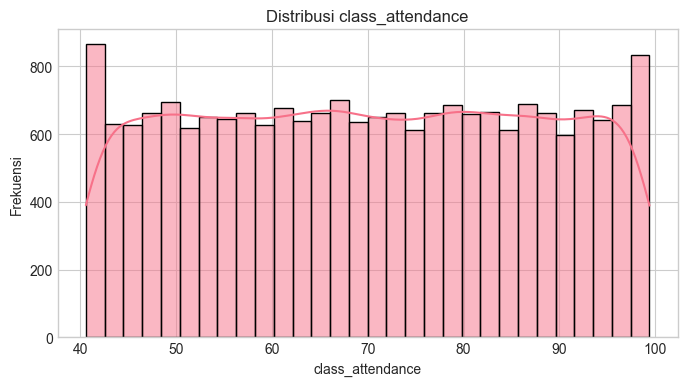

<Figure size 800x400 with 0 Axes>

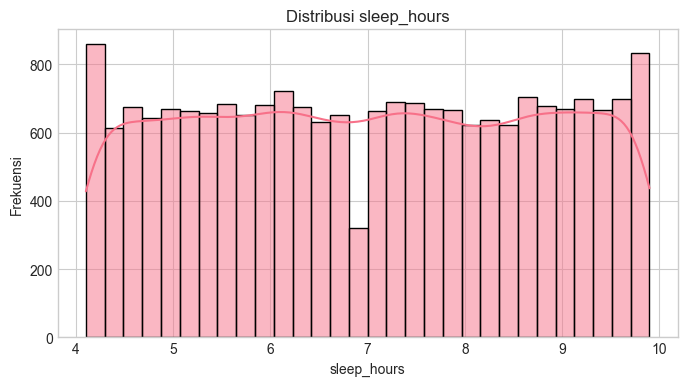

<Figure size 800x400 with 0 Axes>

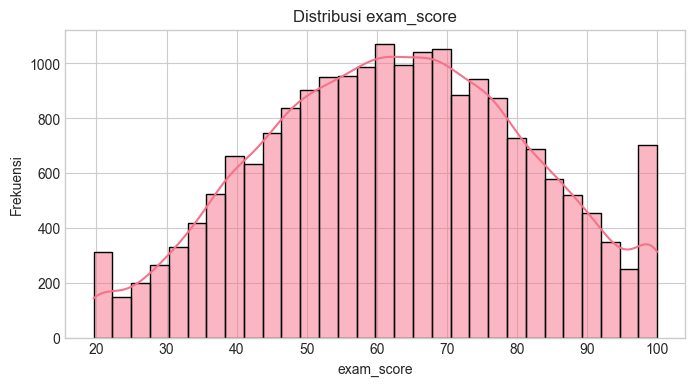

<Figure size 800x400 with 0 Axes>

In [7]:
# Cek data unik pada setiap kolom
print("=" * 60)
print("DATA UNIK PADA SETIAP KOLOM")
print("=" * 60)
for col in df.columns:
    unique_values = df[col].nunique()
    print(f"Kolom '{col}' memiliki {unique_values} nilai unik.")
    if unique_values <= 10:
        print(f"  Nilai unik: {df[col].unique()}")
    print("-" * 40)

# Visualisasi distribusi nilai pada kolom numerik
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("=" * 60)
print("VISUALISASI DISTRIBUSI KOLOM NUMERIK")
print("=" * 60)
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()
    plt.figure(figsize=(8, 4))

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
df_processed = df.copy()
# (Jika ada kolom ID, hapus)
if 'Id' in df_processed.columns:
    df_processed = df_processed.drop('Id', axis=1)

# Hapus duplikat
df_processed = df_processed.drop_duplicates()

# (Jika ada outlier, lakukan capping/winsorization sesuai kebutuhan)

X = df_processed.drop('exam_score', axis=1)
y = df_processed['exam_score']

# Jika ada fitur kategorikal, lakukan encoding
for col in X.select_dtypes(include='object').columns:
    X[col] = pd.factorize(X[col])[0]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi ke DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Simpan hasil preprocessing
train_data = X_train_scaled.copy()
train_data['Performance Index'] = y_train.values
test_data = X_test_scaled.copy()
test_data['Performance Index'] = y_test.values

train_data.to_csv('ExamScore_train.csv', index=False)
test_data.to_csv('ExamScore_test.csv', index=False)
all_data = pd.concat([train_data, test_data], axis=0)
all_data.to_csv('ExamScore_preprocessing.csv', index=False)

print(f"Training data saved: ExamScore_train.csv ({len(train_data)} rows)")
print(f"Testing data saved: ExamScore_test.csv ({len(test_data)} rows)")
print(f"All preprocessed data saved: ExamScore_preprocessing.csv ({len(all_data)} rows)")


Training data saved: ExamScore_train.csv (16000 rows)
Testing data saved: ExamScore_test.csv (4000 rows)
All preprocessed data saved: ExamScore_preprocessing.csv (20000 rows)


In [10]:
# 6. Summary
print("="*60)
print("SUMMARY PREPROCESSING")
print("="*60)
print(f"Dataset awal: {df.shape[0]} baris, {df.shape[1]} kolom")
print(f"Dataset setelah preprocessing: {len(all_data)} baris, {all_data.shape[1]} kolom")
print(f"\nTraining samples: {len(train_data)}")
print(f"Testing samples: {len(test_data)}")
print(f"\nFitur yang digunakan ({len(X.columns)}): {list(X.columns)}")
print(f"Target: Performance Index (nilai {y.min()} - {y.max()})")
print("\n" + "="*60)
print("PREPROCESSING SELESAI!")
print("="*60)

SUMMARY PREPROCESSING
Dataset awal: 20000 baris, 13 kolom
Dataset setelah preprocessing: 20000 baris, 13 kolom

Training samples: 16000
Testing samples: 4000

Fitur yang digunakan (12): ['student_id', 'age', 'gender', 'course', 'study_hours', 'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']
Target: Performance Index (nilai 19.599 - 100.0)

PREPROCESSING SELESAI!
